In [ ]:
!pip install -q "transformers==4.51.3" "bitsandbytes==0.45.5"

In [ ]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, device_map='cuda', low_cpu_mem_usage=True, load_in_4bit=True)

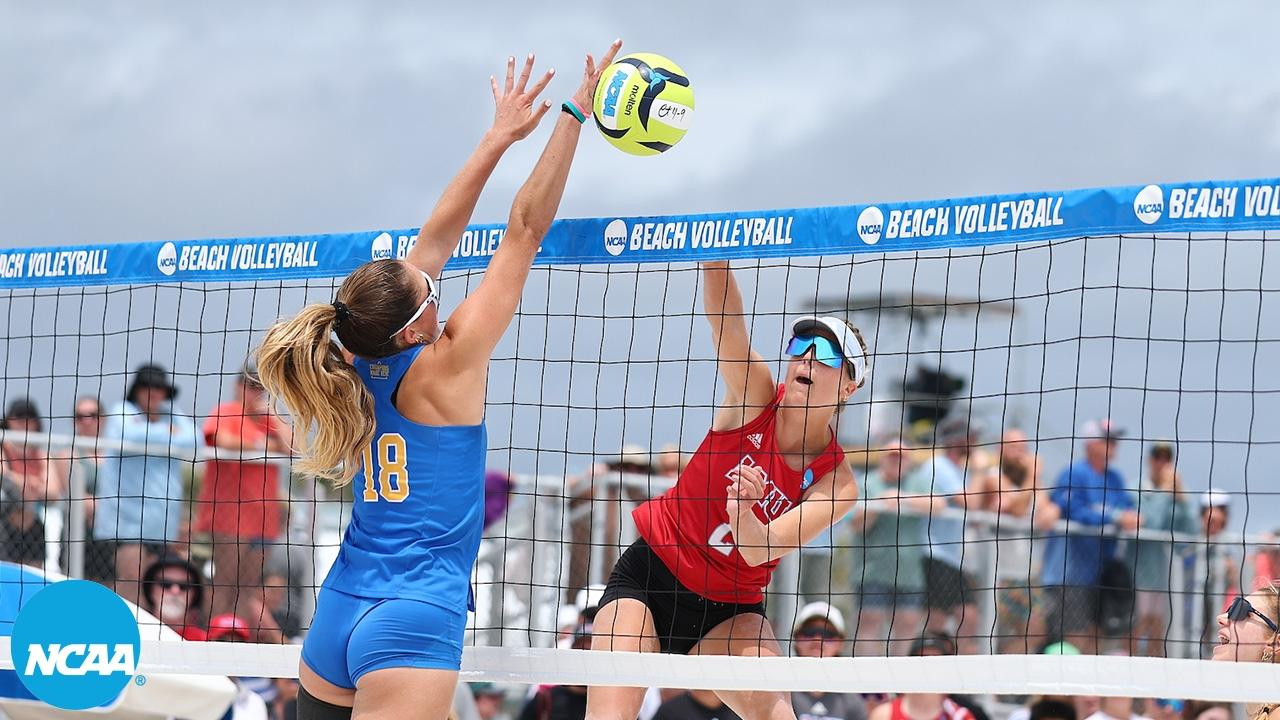

In [ ]:
image = Image.open('/content/volleyball_match.jpg')
image

In [ ]:
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=80)

print(processor.decode(output[0], skip_special_tokens=True))

You may have used the wrong order for inputs. `images` should be passed before `text`. The `images` and `text` inputs will be swapped. This behavior will be deprecated in transformers v4.47.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


[INST]  
What is shown in this image? [/INST] The image shows two women playing beach volleyball. They are both reaching up to hit a volleyball over the net. The setting appears to be a beach volleyball tournament, as indicated by the banners and the presence of spectators in the background. The players are wearing athletic attire suitable for the sport, and the atmosphere suggests a competitive match. 


The image shows two women playing beach volleyball. They are both reaching up to hit a volleyball over the net. The setting appears to be a beach volleyball tournament, as indicated by the banners and the presence of spectators in the background. The players are wearing athletic attire suitable for the sport, and the atmosphere suggests a competitive match.

In [ ]:
prompt = "[INST] <image>\nWhat is written in net? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=80)

print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
What is written in net? [/INST] The image shows a volleyball net with the following text:

- "BEACH VOLLEYBALL"
- "NCAA"
- "REACH VOLLEYBALL"

The text is partially obscured by the players and the net itself. 


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
tell the players name in this image? [/INST] The image shows a group of cricket players wearing the Indian cricket team's uniform. The central figure is the Indian cricket team's captain, Virat Kohli. The other players are members of the Indian cricket team, but their names are not visible in the image. 


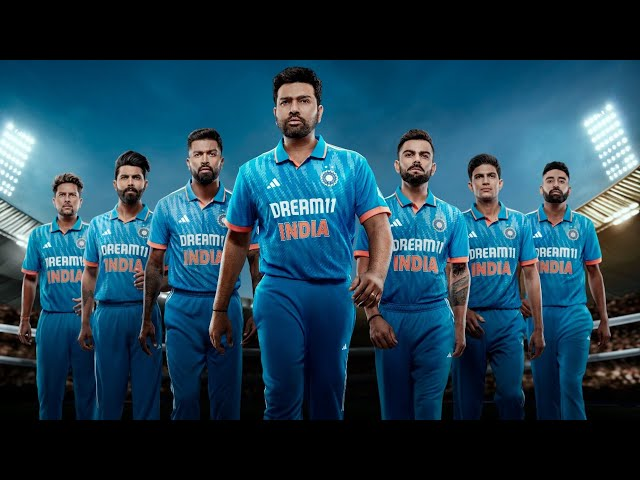

In [ ]:
image = Image.open('/content/cricket.jpg')
prompt = "[INST] <image>\ntell the players name in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))
image

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
What is the type of lung-cancer? [/INST] The image you've provided appears to be a medical illustration or a radiographic image of a lung, possibly showing a tumor or a lesion. However, without more context or a clearer image, it's not possible to definit


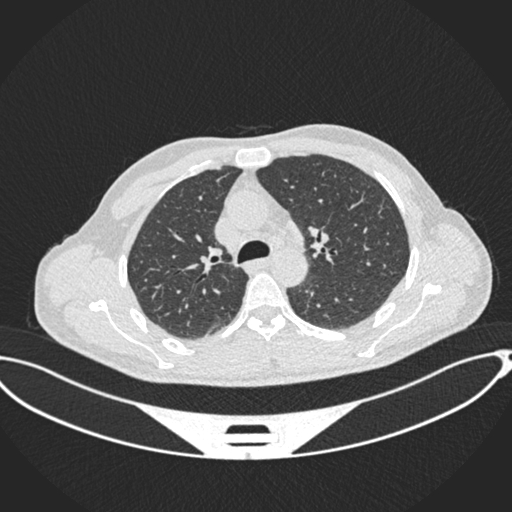

In [ ]:
image = Image.open('/content/image_case.jpg')
prompt = "[INST] <image>\nWhat is the type of lung-cancer? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=50)

print(processor.decode(output[0], skip_special_tokens=True))
image

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
What is this image, extract data from this image [/INST] The image appears to be a receipt or a payment confirmation slip. It contains the following information:

- The date is 03-02-2025.
- The payment mode is "Paytm".
- The item number is 1.
- The item description is "INV113".
- The quantity is 1.
- The price per unit is 1,000.
- The total price is 1,000.
- The GST (Goods and Services Tax) amount is 90.33.
- The CGST (Central Goods and Services Tax) amount is 45.17.
- The SGST (State Goods and Services Tax) amount is 45.16.
- The IGST (Integrated Goods and Services Tax) amount is 90.33.
- The total amount is 1,045.33.
- The receipt is from a place named "E & O E".
- The receipt is signed by "E & O E".

The receipt also includes a logo that seems to be related to a restaurant or a food service establishment, as indicated by the fork and spoon symbol. 


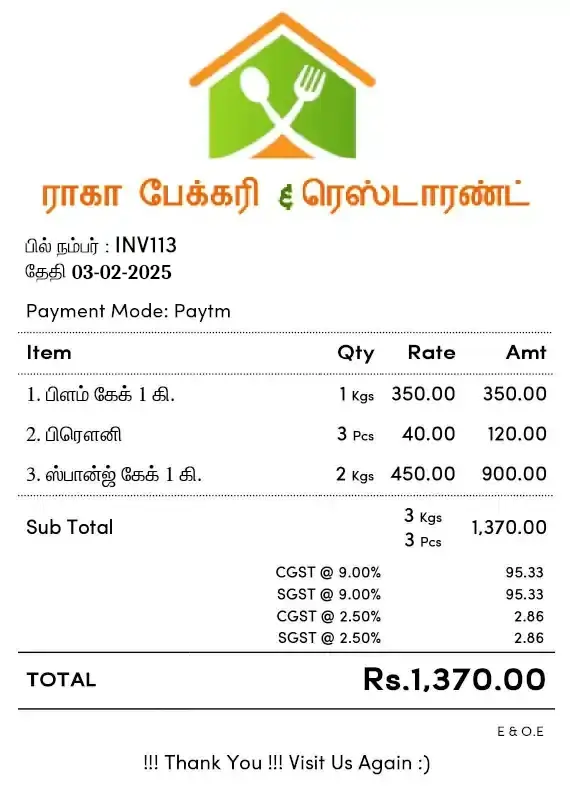

In [ ]:
image = Image.open('/content/invoice.webp')
prompt = "[INST] <image>\nWhat is this image, extract data from this image [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=500)

print(processor.decode(output[0], skip_special_tokens=True))
image